In [1]:
import numpy as np
import numpy.random as npr
import os
import sys
import shutil
import matplotlib.pyplot as plt

currentdir = os.getcwd() 
parent_dir = os.path.dirname(currentdir)
sys.path.insert(0, parent_dir) 
from df_utils_prolific import *
#sys.path.insert(0,'../utils')
#print(sys.path)
from lp_utils import *

import pyomo.environ as pyo
import numpy as np
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import combinations_with_replacement, permutations, product
import pickle
from helper_solution_analysis import *
from run_strategies import *
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
sns.set(font_scale=2, style = 'ticks', palette = 'deep') 

import gym
import gym_furniture

In [2]:
cur_dir =  os.getcwd()
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
#data_file = 'data/prolific/data_FurnitureCompany_2022-06-13_14-10.csv'
data_file ='data/prolific/data_FurnitureCompany_2022-07-07_11-02.csv'
data_path = os.path.join(parent_dir, data_file)

df, df_model, df_ge, df_vp_sol, df_likert,  df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)
df_complete_sol =  get_complete_sol(df_resources)
df_vp_sol

read cache


vp  profit  optimum  difference  trial  month    complete
0     94    22.0     48.0  -54.166667      1      6  incomplete
1     94    41.0     44.0   -6.818182      2      7    complete
2     94    48.0     54.0  -11.111111      3     10  incomplete
3     94    45.0     49.0   -8.163265      4      8    complete
4     94    55.0     60.0   -8.333333      5      4    complete
..   ...     ...      ...         ...    ...    ...         ...
511  249    40.0     60.0  -33.333333      2      4  incomplete
512  249    32.0     51.0  -37.254902      3      2  incomplete
513  249    31.0     48.0  -35.416667      4      6  incomplete
514  249    47.0     54.0  -12.962963      5     10    complete
515  249    51.0     61.0  -16.393443      6      9    complete

[516 rows x 7 columns]

In [3]:
env= gym.make('SmallFurniture-v0')

global_greedy_rewards, global_greedy_actions, global_greedy_states = strategy_run(env)
grouped_greedy_rewards,grouped_greedy_actions, grouped_greedy_states  = strategy_run(env, strategy = 'grouped greedy', first_group = 1)
material_balancing_rewards, material_balancing_actions, material_balancing_states = strategy_run(env, strategy = 'material balancing')
greedy_material_balancing_rewards, greedy_material_balancing_actions, greedy_material_balancing_states = strategy_run(env, strategy = 'greedy material balancing')
greedy_then_material_balancing_rewards, greedy_then_material_balancing_actions, greedy_then_material_balancing_states = strategy_run(env,strategy = 'greedy, then material balancing')
minimize_min_rewards, minimize_min_actions, minimize_min_states = strategy_run(env,strategy = 'minimize_min')
gr_minimize_min_rewards, gr_minimize_min_actions, gr_minimize_min_states = strategy_run(env,strategy = 'greedy_minimize_min')
cost_benefit_rewards, cost_benefit_actions, cost_benefit_states = strategy_run(env,strategy = 'cost_benefit')

strategy_dict = {'global greedy':global_greedy_actions,
                 'grouped greedy': grouped_greedy_actions,
                 'material balancing':material_balancing_actions,
                 'greedy material balancing':greedy_material_balancing_actions,
                 'greedy, then material balancing': greedy_then_material_balancing_actions,
                 'minimize_min':minimize_min_actions,
                 'greedy_minimize_min': gr_minimize_min_actions,
                'cost_benefit': cost_benefit_actions}

/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cath/Downloads/s/envs/plexplain/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


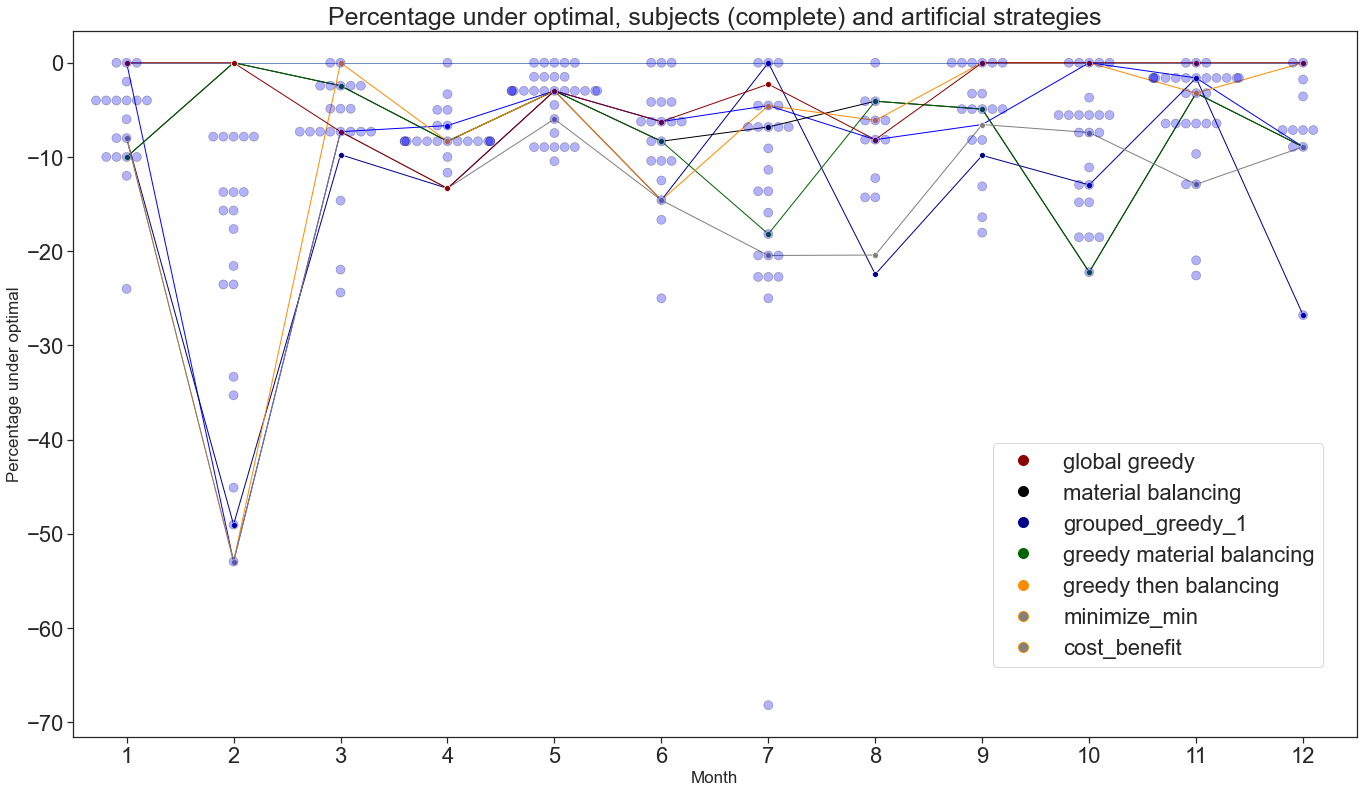

In [4]:
fig = plt.figure(figsize=(23, 13) )
plt.title('Percentage under optimal, subjects (complete) and artificial strategies', fontsize = 25)




sns.lineplot(x=list(range(12)),y=np.zeros(12), linewidth = 0.8)

sns.swarmplot(data = df_vp_sol[df_vp_sol.complete == 'complete'] ,x='month', y = 'difference', alpha = 0.3,  size = 9,linewidth = 0.7, edgecolor="black", color = 'blue')

line1 = sns.lineplot(x=list(range(12)),y=get_diff(global_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'blue')
line2 = sns.lineplot(x=list(range(12)),y=get_diff(material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'black')
line3 = sns.lineplot(x=list(range(12)),y=get_diff(grouped_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkblue')
line4 = sns.lineplot(x=list(range(12)),y=get_diff(greedy_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkgreen')
line5 = sns.lineplot(x=list(range(12)),y=get_diff(greedy_then_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkorange')
line6 = sns.lineplot(x=list(range(12)),y=get_diff(minimize_min_rewards),   
                     linewidth = 1,  marker = "o", color = 'grey')
line7 = sns.lineplot(x=list(range(12)),y=get_diff(cost_benefit_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkred')
xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)
custom_handles = [Line2D([], [], marker='o', color='darkred',linestyle='None',markerfacecolor='darkred', 
                         markersize=10), 
                  Line2D([], [], marker='o', color='black',linestyle='None', markerfacecolor='black', 
                         markersize=10), 
                  Line2D([], [], marker='o', color='darkblue',linestyle='None',markerfacecolor='darkblue',
                         markersize=10), 
                  Line2D([], [], marker='o', color='darkgreen',linestyle='None',markerfacecolor='darkgreen',
                         markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='darkorange', 
                         markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='grey',
                         markersize=10),
                  Line2D([], [], marker='o', color='darkorange',linestyle='None',markerfacecolor='grey', 
                         markersize=10)]


custom_labels = ['global greedy', 'material balancing', 'grouped_greedy_1', 'greedy material balancing', 'greedy then balancing', 'minimize_min', 'cost_benefit']
l = fig.legend(custom_handles, custom_labels, bbox_to_anchor=(0.88, 0.2), loc='lower right', borderaxespad=0.)
fig.savefig('Images/strategies/difference_to_optimal_strategies.jpg',bbox_inches='tight')


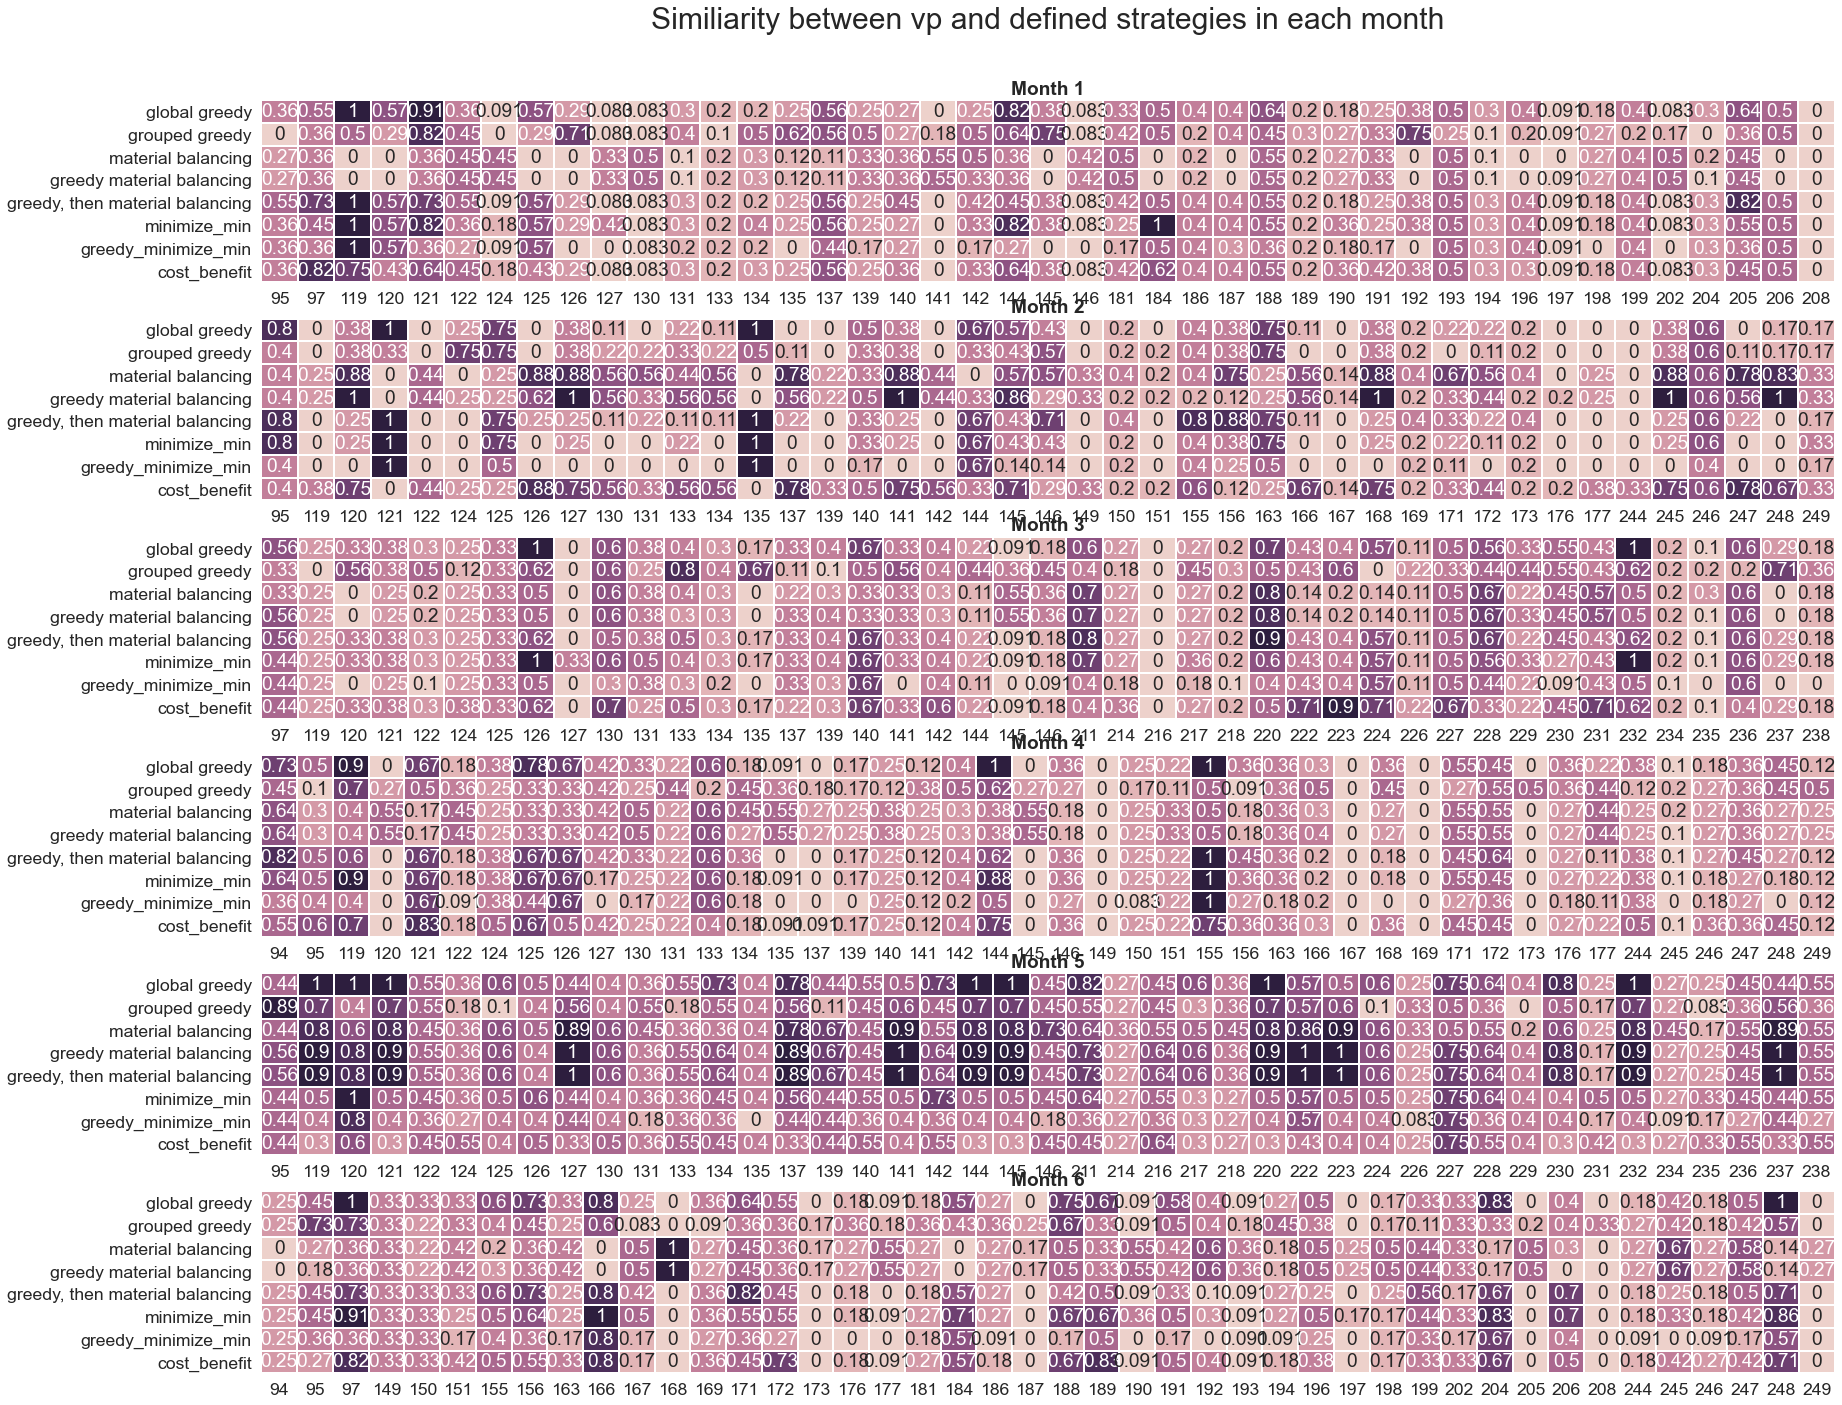

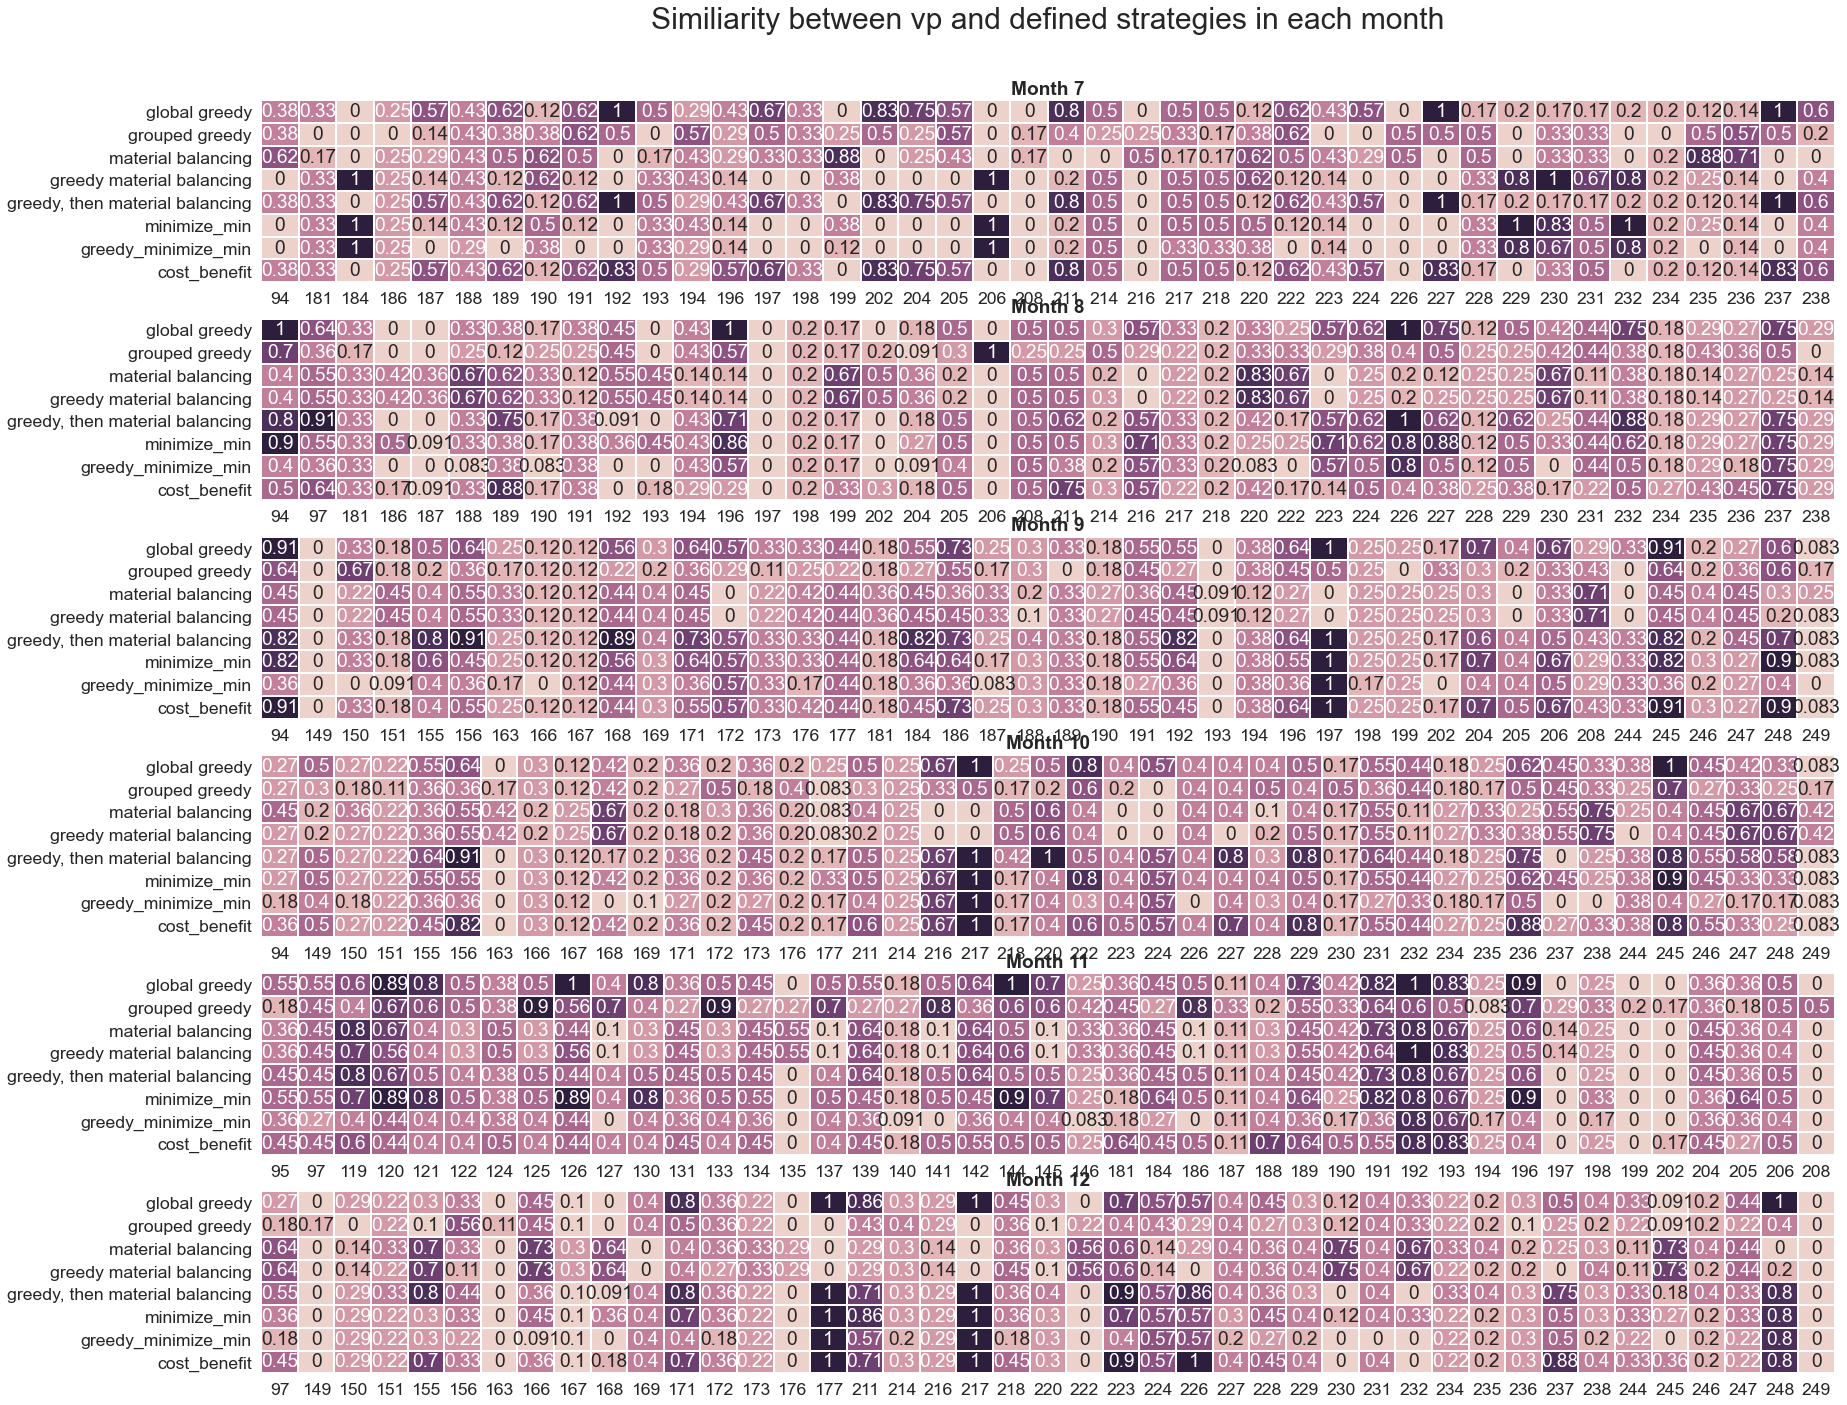

In [7]:
for h in range(2):
    sns.set(font_scale=1.6, style = 'white', palette = 'deep') 
    fig = plt.figure(figsize=(23, 26) )
    fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   
    fig.suptitle('Similiarity between vp and defined strategies in each month', fontsize = 30)
    fig.tight_layout()
    for m in range(1+h*6,7+h*6):
        sub = fig.add_subplot(6,1,m-h*6)
        sub.set_title('Month ' + str(m), fontweight='bold')
        df_vps = get_solution_df(solution_dict(m,df_built))
        sim_mat = pd.DataFrame(index = list(strategy_dict.keys()), columns =df_vps.vp.unique())
        for idx in sim_mat.index:
            for col in sim_mat.columns:
                state = env.reset(m-1)

              #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
              #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
                #print(col)
                #print(col)
                vp_traj = get_vp_solutions(df_built, col, m)
                if idx == 'grouped greedy':

                    sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx,1)
                else:
                    sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
        colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
        #if m !=12:
            #sns.heatmap(data = sim_mat.astype(float),
           #                         cbar = False,  cmap = colormap,
           #                         annot = True, linewidths=1, xticklabels=False)
        #else:
        sns.heatmap(data = sim_mat.astype(float),
                                    cmap = colormap, cbar = False, 
                                    annot = True, linewidths=1, cbar_kws={'label': 'Trajectory similiarity', 'orientation': 'horizontal', 'shrink': 0.6})
    fig.savefig('Images/strategies/similiarity_between_vps_and_strategies_month_'+ str(1+h*6)+ '_'+str(6+h*6)+'.jpg',bbox_inches='tight')

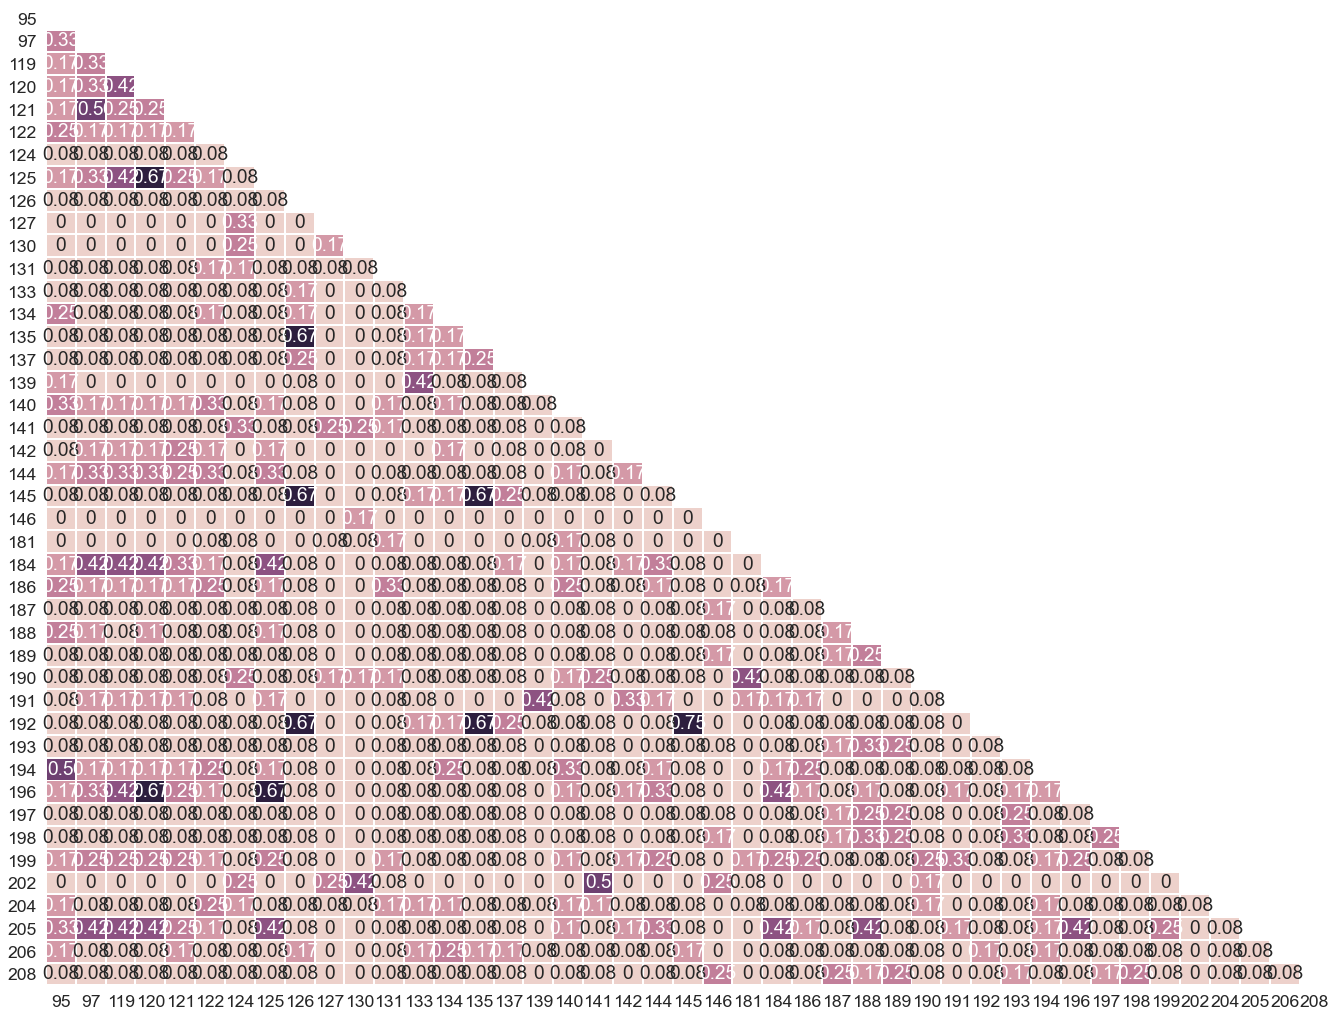

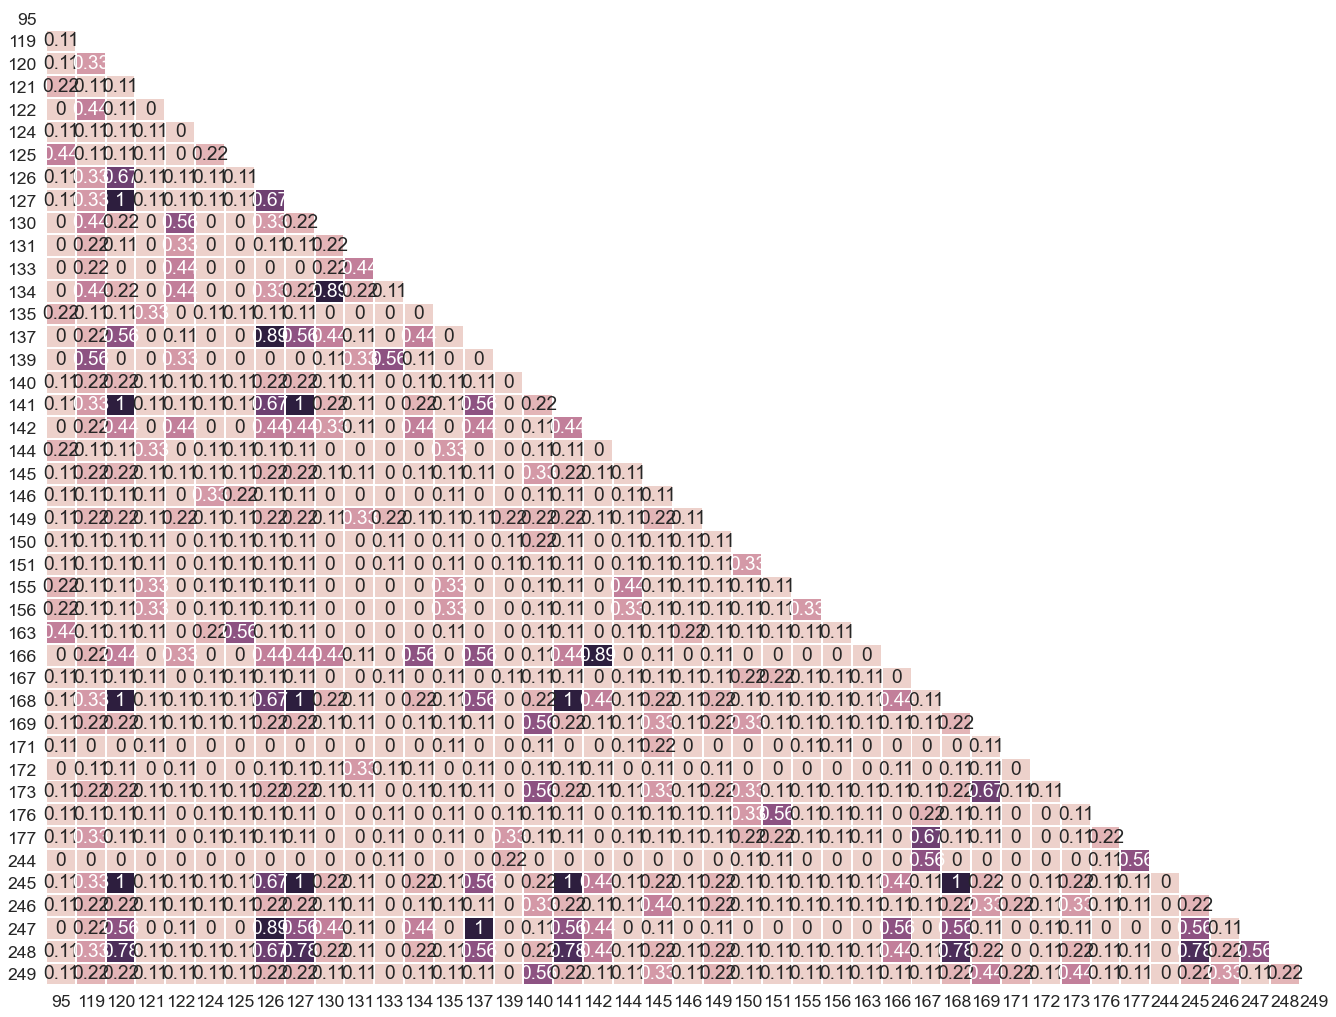

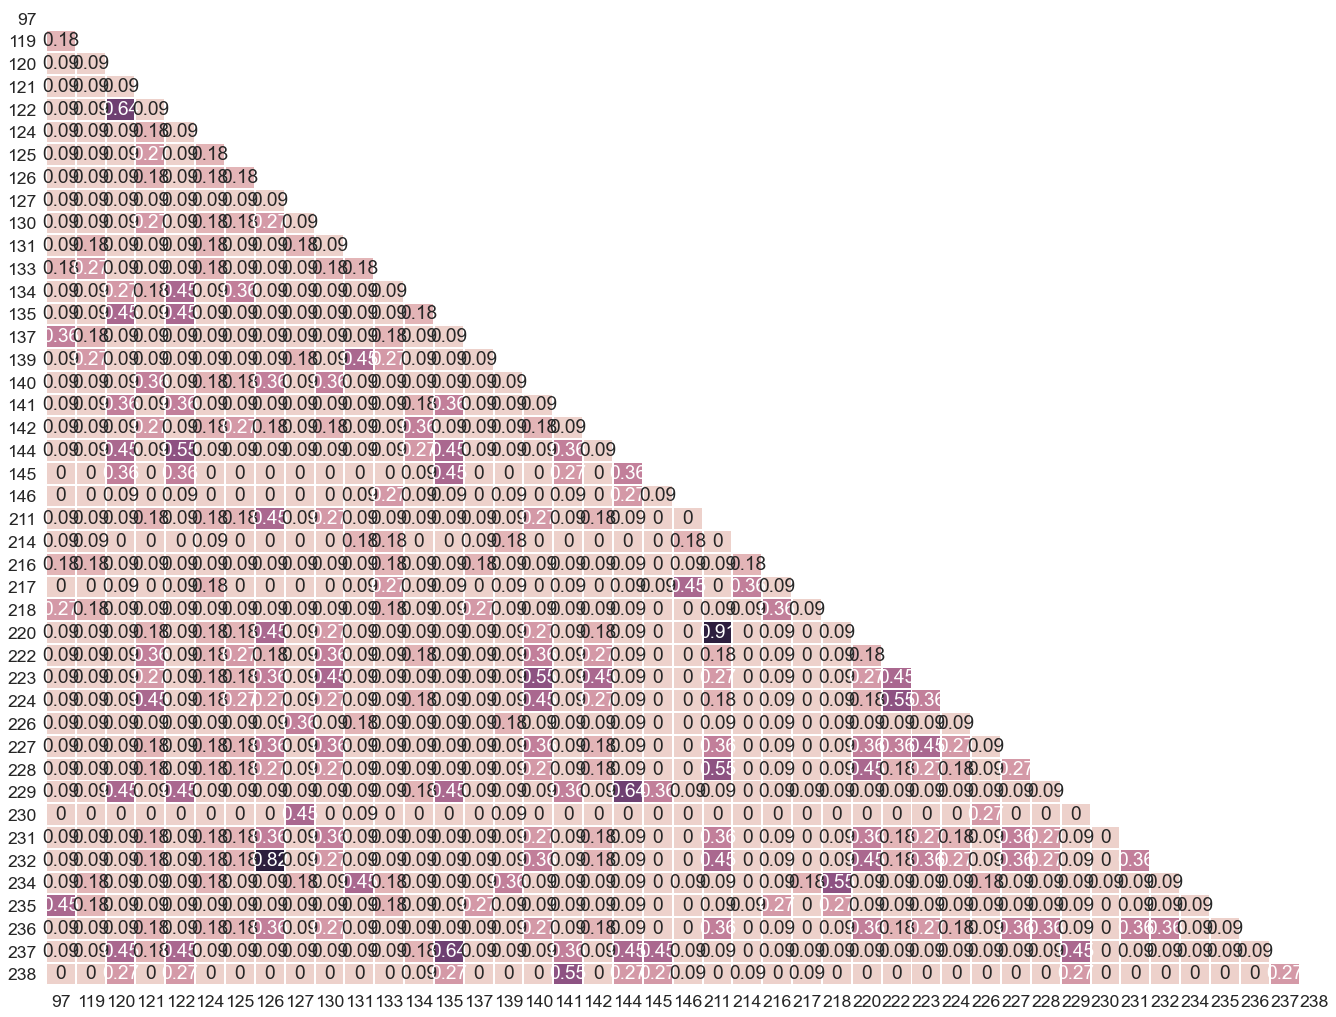

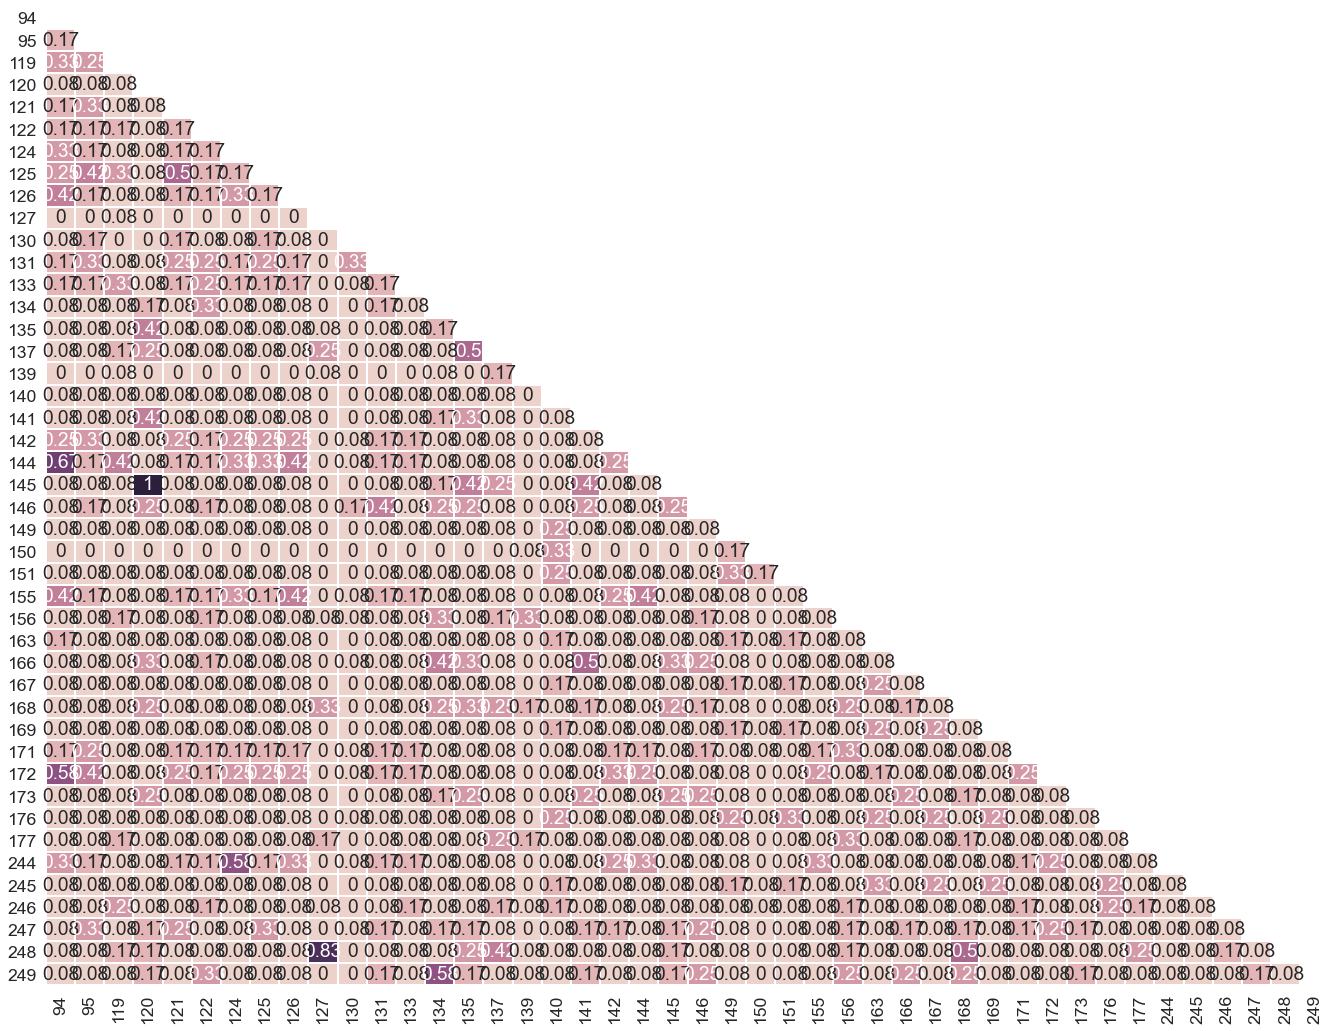

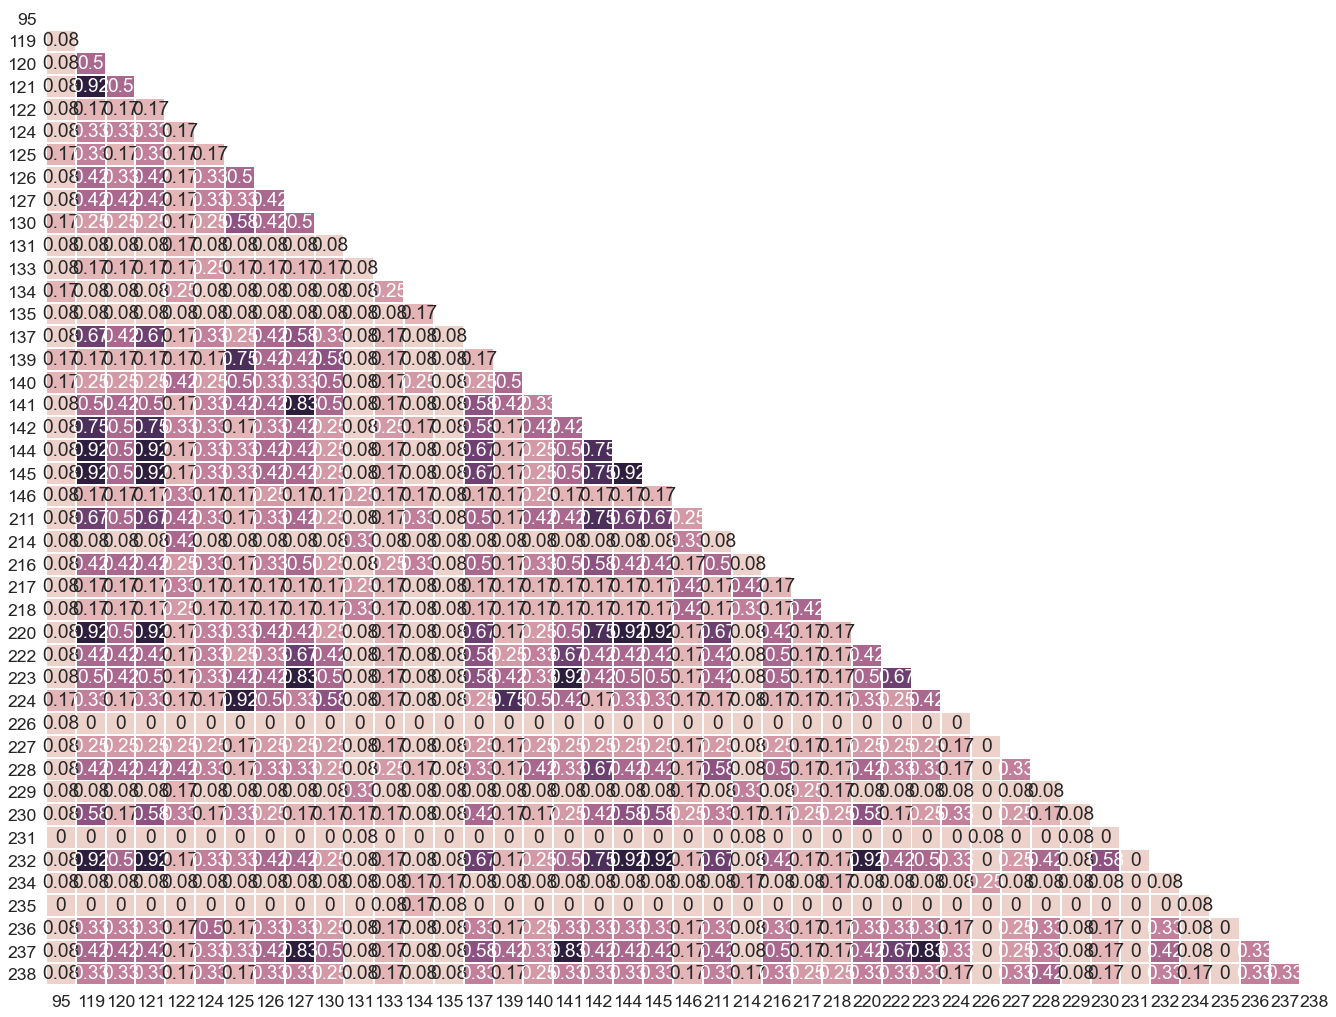

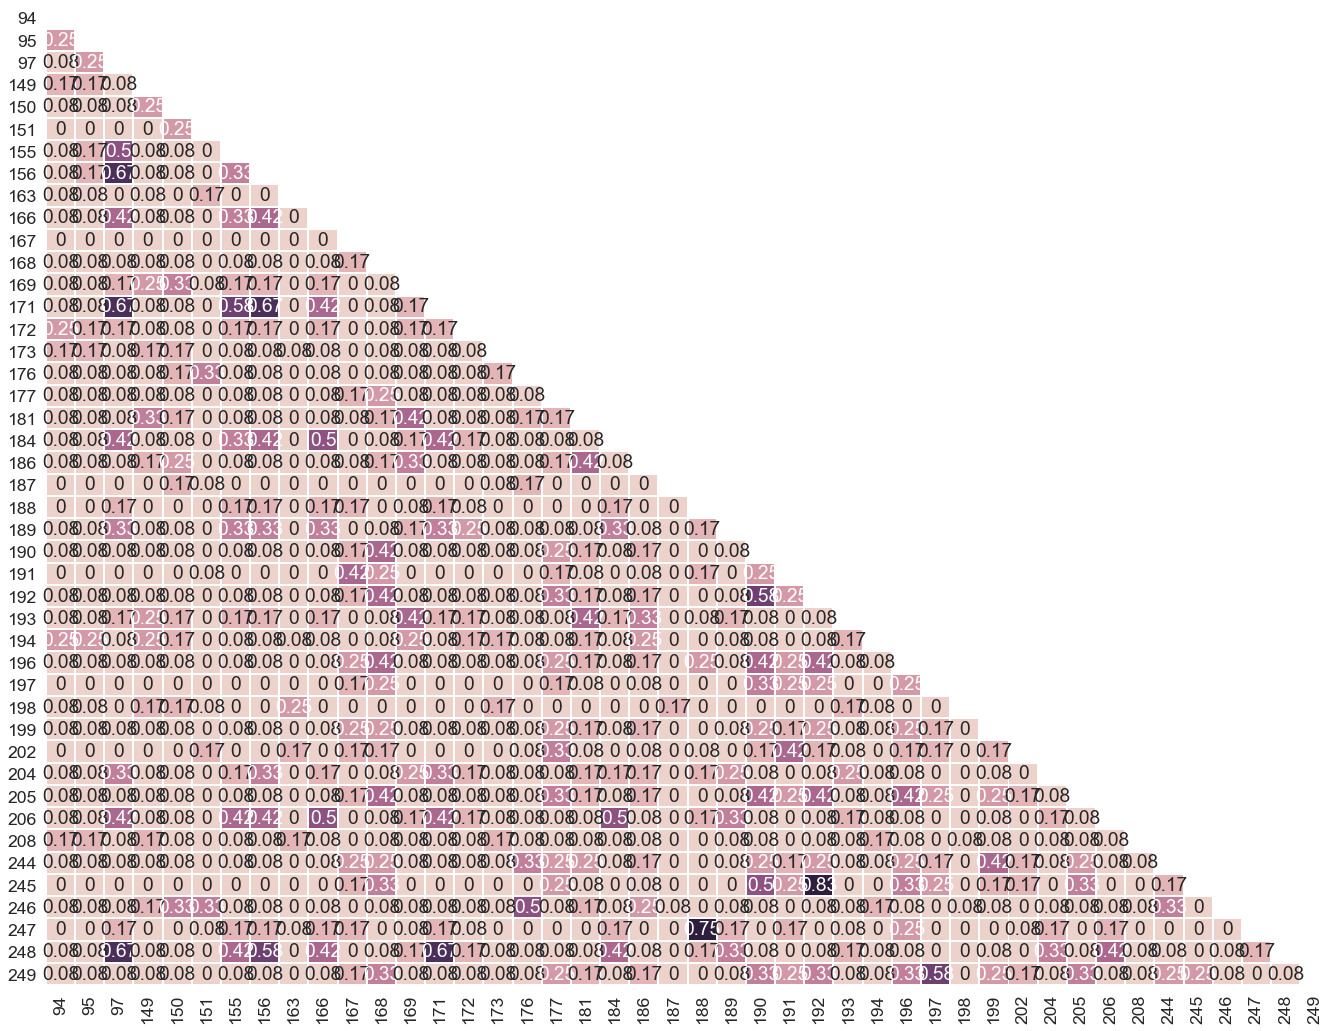

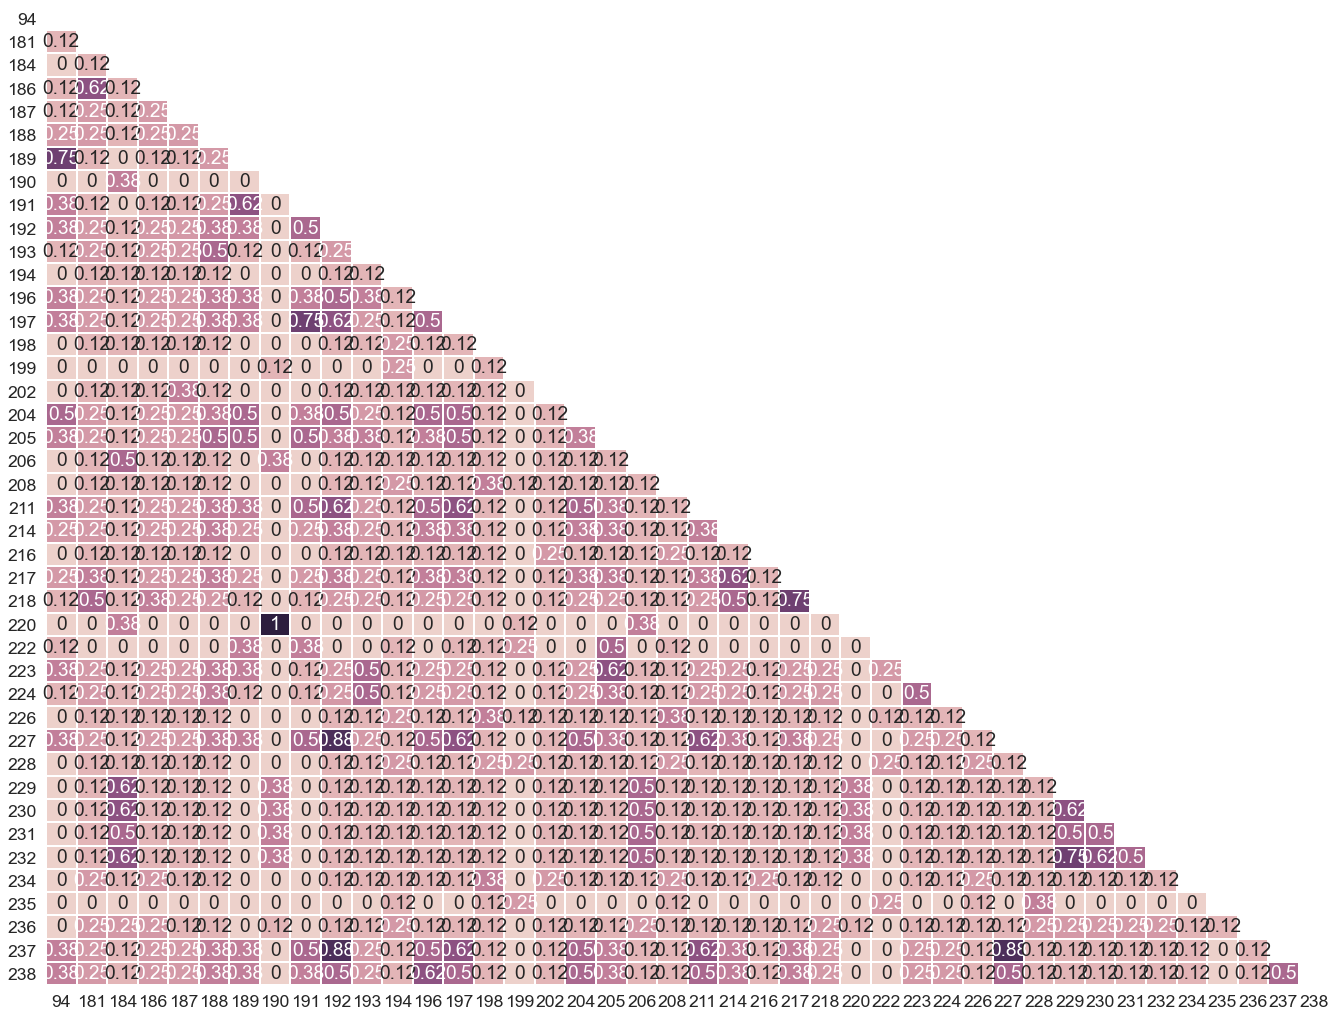

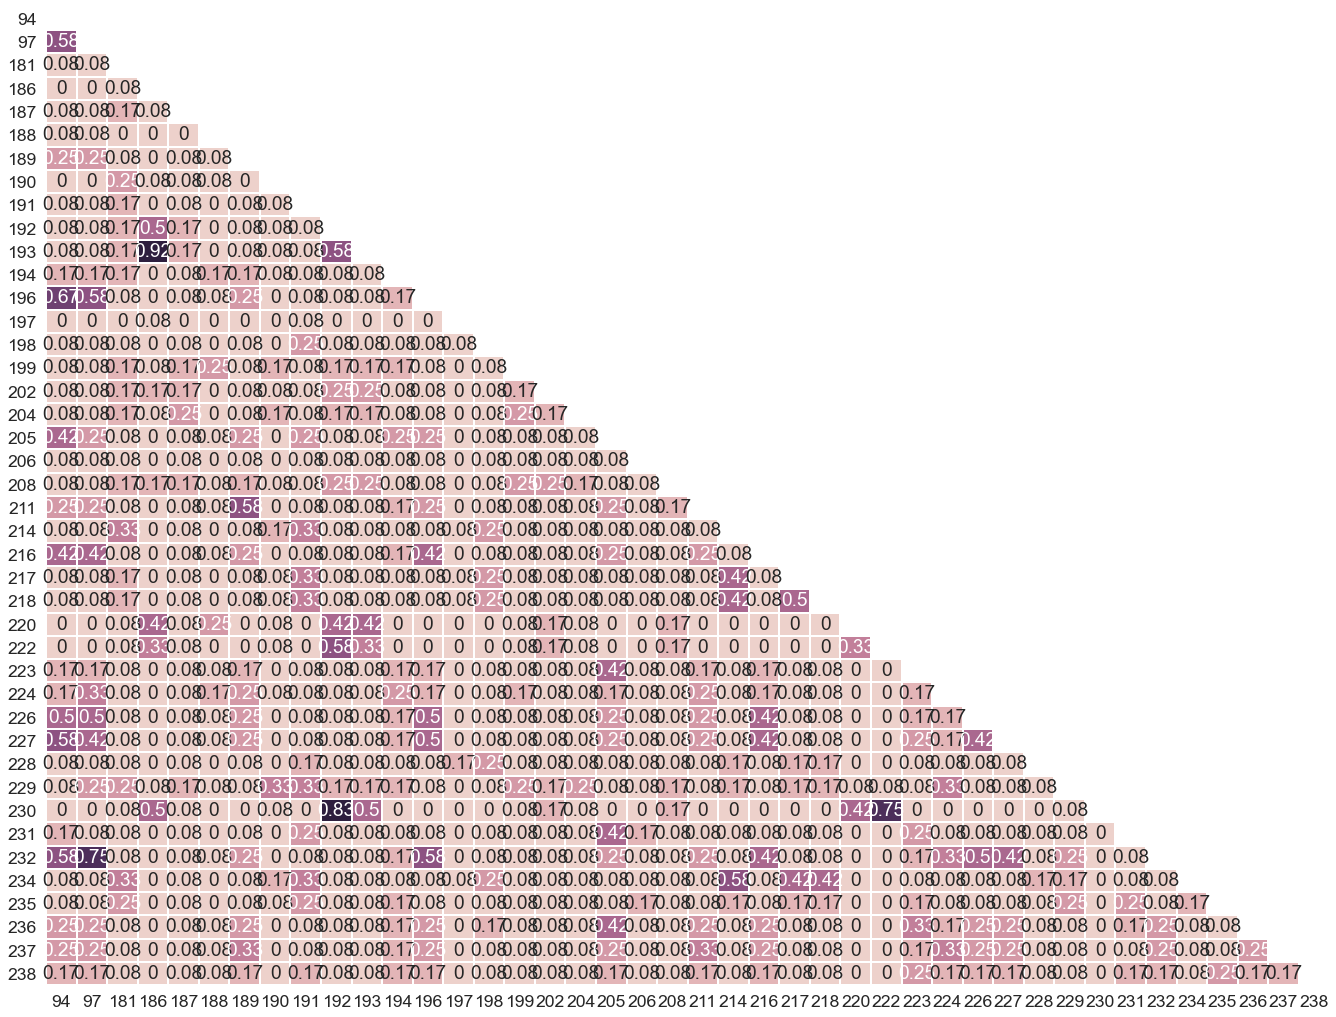

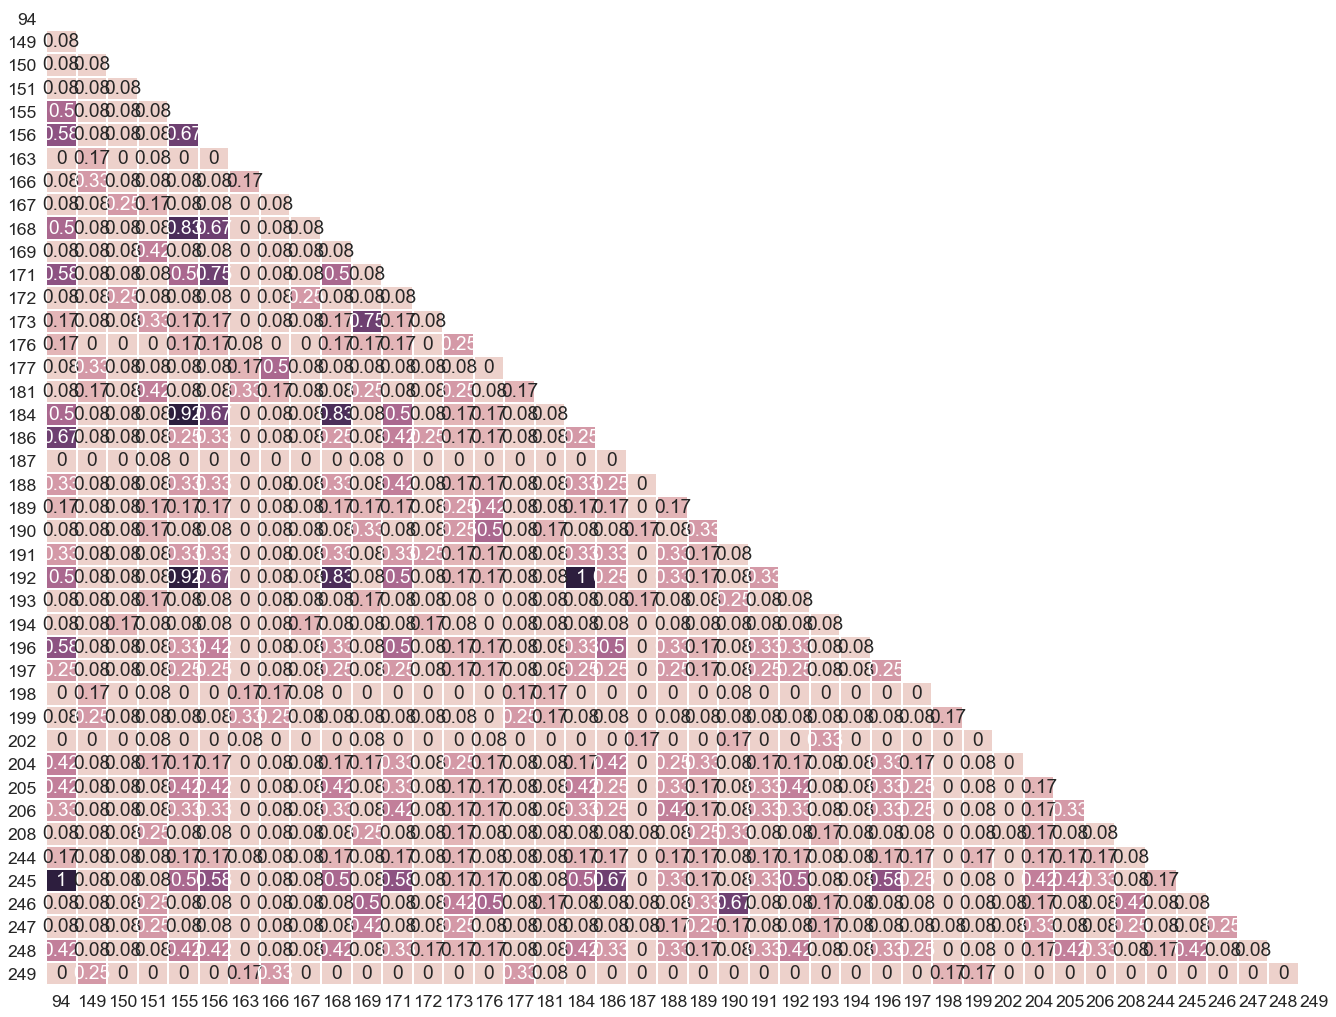

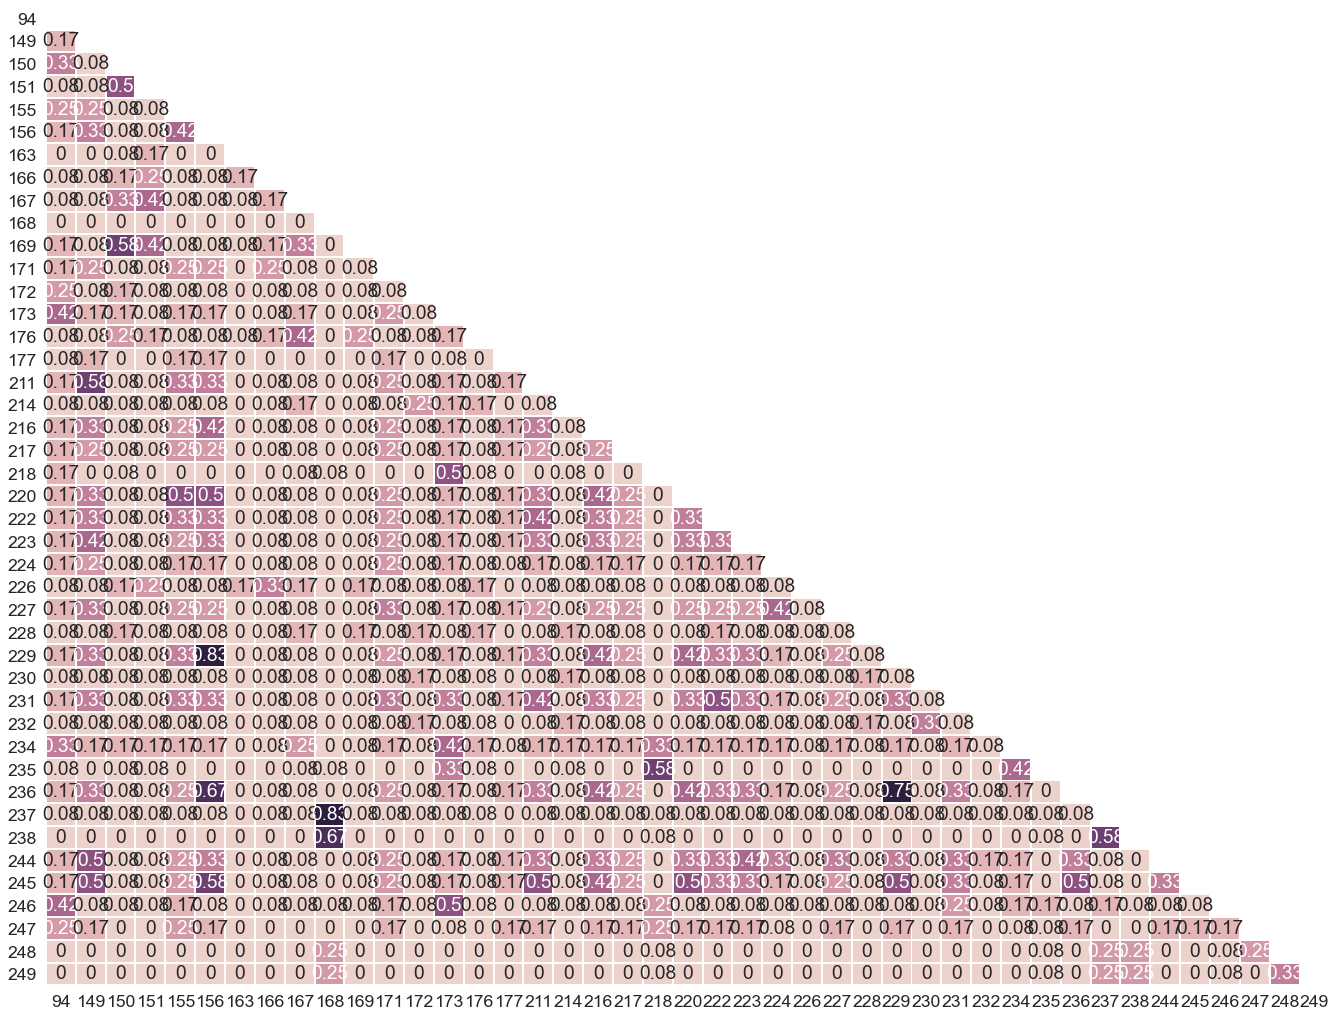

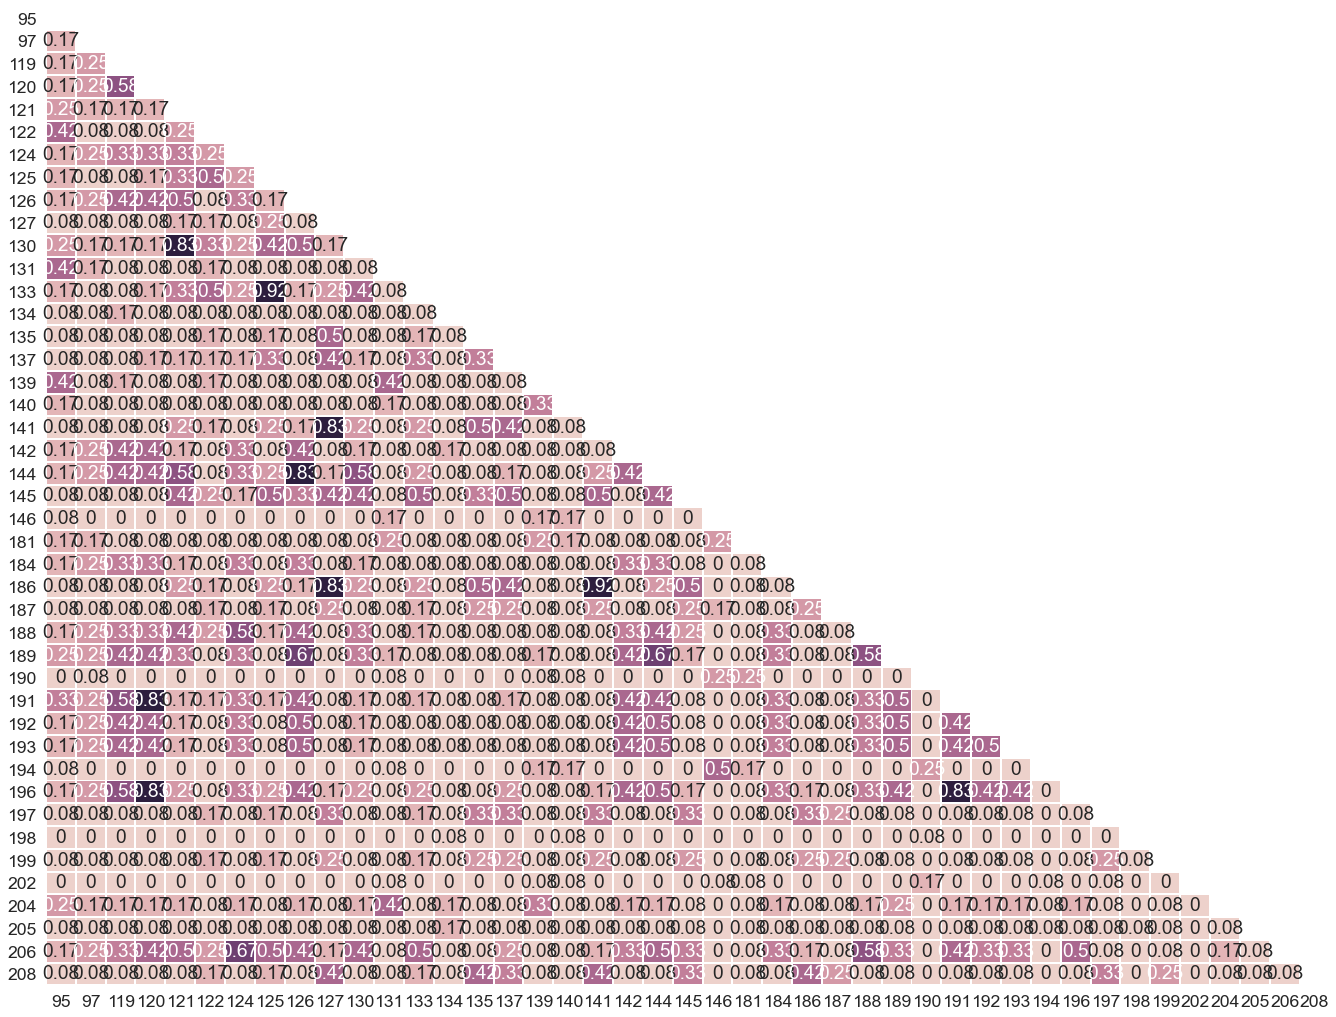

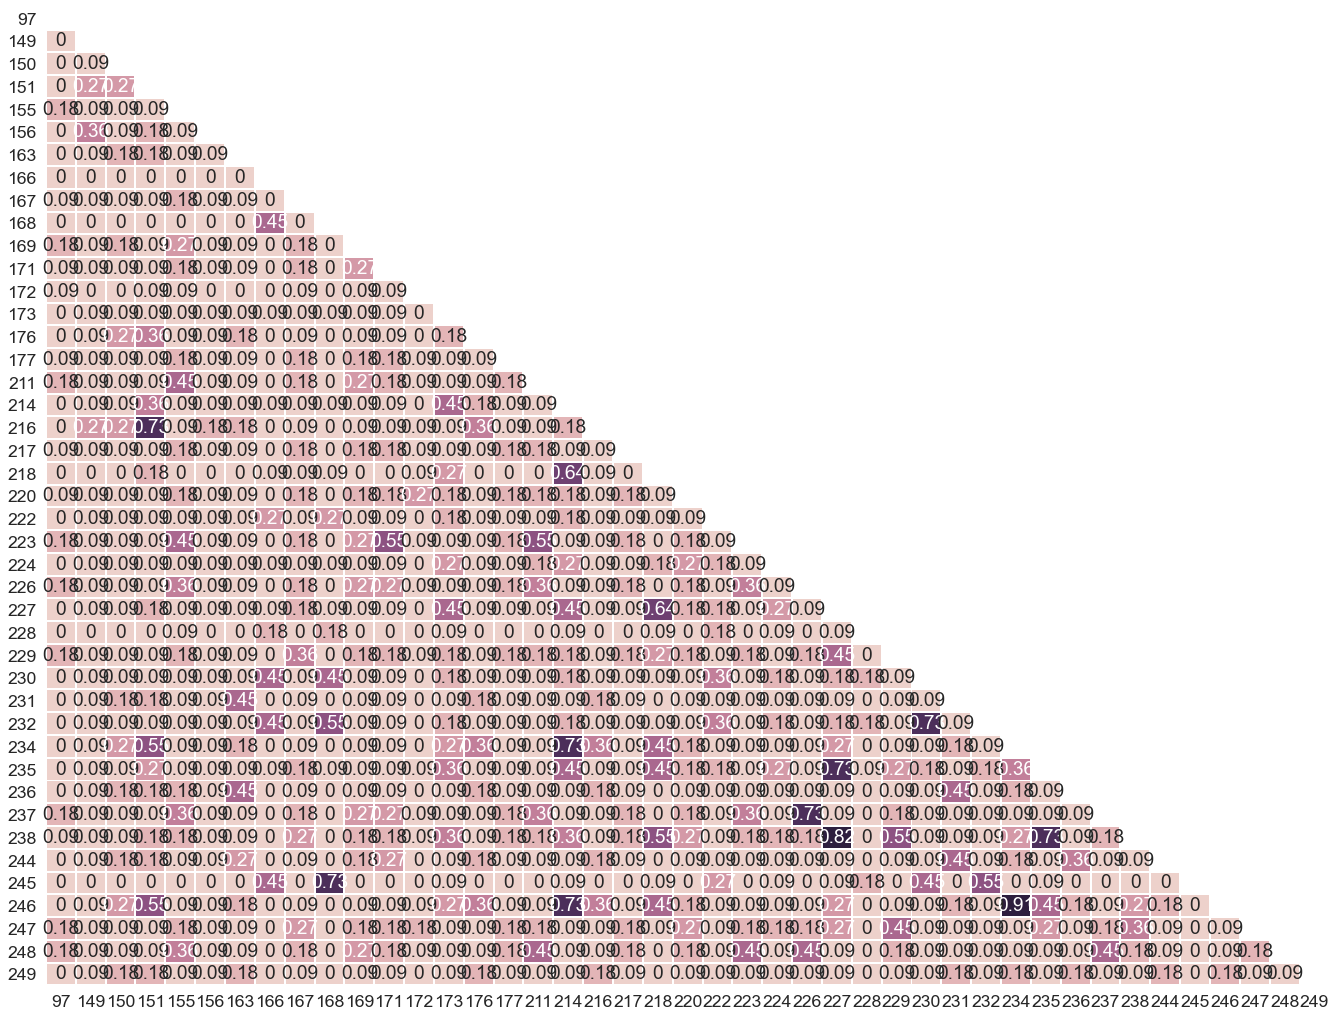

In [9]:
for m in range(1,13):
    fig = plt.figure(figsize=(23, 18) )
    df_vps = get_solution_df(solution_dict(m,df_built))
    sim_mat = pd.DataFrame(index = df_vps.vp.unique(), columns =df_vps.vp.unique())
    for idx in sim_mat.index:
        for col in sim_mat.columns:
            s1 = df_vps[(df_vps.vp== idx) ].solutions[1:]
            s2 = df_vps[(df_vps.vp== col) ].solutions[1:]

            sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity(s1, s2)
    colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
    mask = np.triu(np.ones_like(sim_mat, dtype=np.bool))

    sns.heatmap(data = sim_mat.astype(float).round(2),mask = mask,
                                cmap = colormap,  
                                annot = True, linewidths=1, cbar = False)

    fig.savefig('Images/strategies/similiarity_between_vps_month_'+ str(m)+'.jpg',bbox_inches='tight')

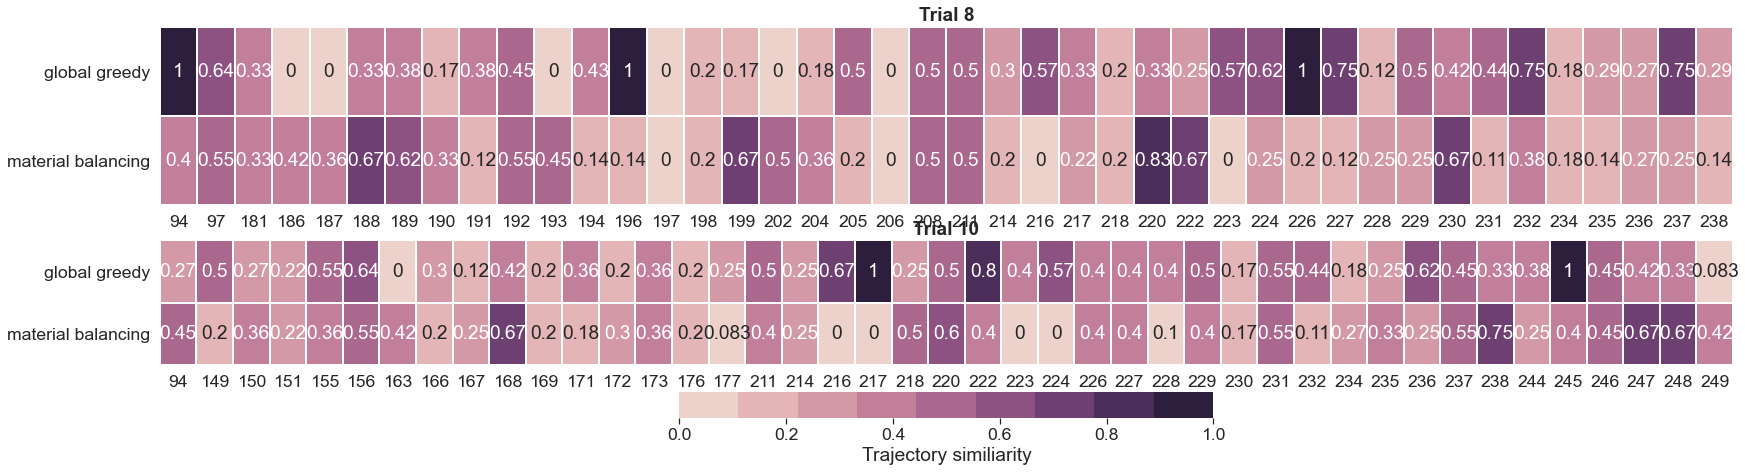

In [14]:
sns.set(font_scale=1.6, style = 'white', palette = 'deep') 
fig = plt.figure(figsize=(23, 8) )
fig.subplots_adjust(bottom=0.25, left=0.025, top = 0.93, right=0.975)   
#fig.suptitle('Similiarity between vp and defined strategies in each month', fontsize = 30)
fig.tight_layout()
sub = fig.add_subplot(2,1, 1)
m = 8

sub.set_title('Trial ' + str(m), fontweight='bold')
df_vps = get_solution_df(solution_dict(m,df_built))
sim_mat = pd.DataFrame(index = ['global greedy', 'material balancing'], columns =df_vps.vp.unique())
for idx in sim_mat.index:
    for col in sim_mat.columns:
        state = env.reset(m-1)

      #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
      #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
        vp_traj = get_vp_solutions(df_built, col, m)

        sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
sns.heatmap(data = sim_mat.astype(float),
                            cbar = False,  cmap = colormap,
                            annot = True, linewidths=1)
sub = fig.add_subplot(2,1, 2)
m = 10

sub.set_title('Trial ' + str(m), fontweight='bold')
df_vps = get_solution_df(solution_dict(m,df_built))
sim_mat = pd.DataFrame(index = ['global greedy', 'material balancing'], columns =df_vps.vp.unique())
for idx in sim_mat.index:
    for col in sim_mat.columns:
        state = env.reset(m-1)

      #  s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
      #  s2 = df_vps[(df_vps.vp== col) &(df_vps.month == m)].solutions[1:]
        vp_traj = get_vp_solutions( df_built,col, m)

        sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, vp_traj, m, idx)
colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)
sns.heatmap(data = sim_mat.astype(float),
                            cbar = True,  cmap = colormap,
                            annot = True, linewidths=1, cbar_kws={'label': 'Trajectory similiarity', 'orientation': 'horizontal', 'shrink': 0.6})
fig.savefig('Images/strategies/paper_similiarity.jpg',bbox_inches='tight')

In [ ]:
df_built[(df_built.vp ==184) &(df_built.month == 8)]

In [ ]:
solution = {}
current_sol = [0,0,0,0]
solution[94] = [tuple(current_sol)]
len(solution[94])

In [ ]:
furniture_list(df_built,[94], 4)